#  미니 프로젝트 : 가위 바위 보 분류기 만들기

## 1. 데이터 만들기

https://teachablemachine.withgoogle.com/ 가위, 바위, 보의 데이터를 만드는 곳

In [1]:
#디렉토리 만들기(각 파일별)

!mkdir -p ~/aiffel/rock_scissor_paper/scissor
!mkdir -p ~/aiffel/rock_scissor_paper/rock
!mkdir -p ~/aiffel/rock_scissor_paper/paper

!ls -l ~/aiffel/rock_scissor_paper

total 196
-rw-r--r-- 1 root root 35218 Jul 19 17:00 '가위바위보 new.ipynb'
drwxr-xr-x 3 root root 53248 Jul 19 16:06  paper
drwxr-xr-x 3 root root 45056 Jul 19 16:04  rock
drwxr-xr-x 3 root root 61440 Jul 19 16:05  scissor
drwxr-xr-x 2 root root  4096 Jul 19 08:56  test


In [2]:
# 원하는 디렉토리로 이동 =3
! cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
! unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
! cd  ~/aiffel/rock_scissor_paper/scissor
! unzip scissor.zip

! cd  ~/aiffel/rock_scissor_paper/paper
! unzip paper.zip

unzip:  cannot find or open rock.zip, rock.zip.zip or rock.zip.ZIP.
unzip:  cannot find or open scissor.zip, scissor.zip.zip or scissor.zip.ZIP.
unzip:  cannot find or open paper.zip, paper.zip.zip or paper.zip.ZIP.


= unzip 할 때는 Cloud shell에서 진행!!

### 1-1  각 파일별 이미지 사이즈 조절

In [4]:
#28x28로 만들기 위해서,PIL라이브러리를 사용하기 위해 파일 불러 오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [5]:
# 이미지 사이즈 조절 함수 
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1528  images to be resized.
1528  images resized.
가위 이미지 resize 완료!


In [6]:
import os

# 이미지 사이즈 조절 함수
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1534  images to be resized.
1534  images resized.
바위 이미지 resize 완료!


In [7]:
import os

# 이미지 사이즈 조절 함수
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1527  images to be resized.
1527  images resized.
보 이미지 resize 완료!


### 1-2  train data  불러오고 출력

In [8]:
import numpy as np

def load_data(img_path, number_of_data=4589):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4589 입니다.
x_train shape: (4589, 28, 28, 3)
y_train shape: (4589,)


라벨:  0


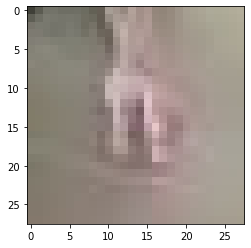

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

## 2. 딥러닝 네트워크 설계하기

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(120, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 60)        1680      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 120)       64920     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 120)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               360120    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

## 3.딥러닝 네트워크 학습시키기

In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
144/144 [==============================] - 1s 6ms/step - loss: 0.1494 - accuracy: 0.9542
Epoch 2/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 3/10
144/144 [==============================] - 1s 5ms/step - loss: 0.2041 - accuracy: 0.9307
Epoch 4/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0312 - accuracy: 0.9893
Epoch 5/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 6/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0368 - accuracy: 0.9865
Epoch 7/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0434 - accuracy: 0.9835
Epoch 8/10
144/144 [==============================] - 1s 5ms/step - loss: 0.1742 - accuracy: 0.9611
Epoch 9/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0356 - accuracy: 0.9905
Epoch 10/10
144/144 [==============================] - 1s 5ms/step - loss: 0.0042 - accuracy: 0.9977

## 테스트 진행

In [12]:
! mkdir -p ~/aiffel/rock_scissor_paper/test

학습데이터(x_train)의 이미지 개수는 7889 입니다.
x_test shape: (7889, 28, 28, 3)
y_test shape: (7889,)
라벨:  0


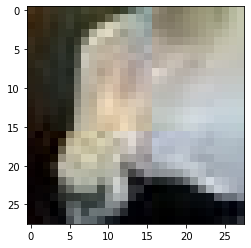

In [14]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path, 7889)  # 가위바위보 이미지 개수 총합에 주의
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 shape 확인
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 데이터 1개 출력해서 확인
plt.imshow(x_test[1])
print('라벨: ', y_test[1])

In [18]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

247/247 - 1s - loss: 2.1775 - accuracy: 0.7816
test_loss: 2.177480936050415 
test_accuracy: 0.7815946340560913


## 프로젝트 정리 및 배우게 된것

### 1. 데이터 만드는 과정

1. 파일을 불러오는 과정에서 폴더 이름이 같아야 된다는 점!
2. train 파일과 test파일을 쓰기 위해서는 unzip해주기(zip파일의 경우)
3. 데이터를 불러오고 + 이미지 크지 줄이기
 - PIL라이브러리 불러온 후 resize() 함수를 이용해서 사진 크기 줄어 주기
4. 숫자 손글씨 인식기할 때 nmist.load_data()함수를 이용해서 데이터를 읽었었다. 가위바위보에는 load_data()함수를 사용
* train data,test data불러 올때 쓰임

### 딥러닝 네트워크 설계 및 훈련

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(120, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


1. Conv2D - 이미지 특징의 수 - 60개의 이미지 특징, 120개의 이미지 고려(이미지가 복잡하고 디테일이 많을 경우 특징의 수를 늘려 보는 것도 고려)
2. Dense레이어의 첫번째는 뉴련으 숫자 - 값이 클수록 보다 복잡한 분류기를 만들 수 있음(ex- 만약 알파벳의 대문자와 소문자를 구분할 때, 대문자 26개, 소문자 26개 총 52개의 클래스로 분류해야한다. 그래서 32보다는 큰 64 또는 128 등을 고려) 
3. 마지막, Dense 레이어의 뉴런 숫자는 분류해내야하는 클래스 수로 지정 (숫자에서는 10개, 알파벳에서는 52로 지정)
4.input_shape=(28,28,3) ->28은 크기, 3은 RGB (만약 흑백인 경우는 1로 설정)

### 모델 성능 테스트

1. 첫번째는 train data를 파일별(가위, 바위, 보)로 303장으로 학습을 시켜고 test data 2400장으로 테스트를 한 결과 0.4정도가 나왔다.  
2. 두번째는 보완을 하기 위해서 train data 4589, test 7889장으로 테스트를 한결과 0,78이라는 결과를 가져올 수 있었다.

--- 테스트를 코드를 진행하면서 ---
* 모델 테스트를 할 경우에도 파일을 만들어 따로 파일을 넣어주고 unzip 해주고, 사이즈를 다시 줄여줘야 된다는 점!